# Are people with work experience bagged by companies?

### Business Understanding

As a programmer, it is interesting to know more about coders who have more than 10 years of work experience.

Along with learning more about expeienced coders, I also would like to see if relevant formal-education would help coders in getting employment.  

For this project, I was interested in using Stack Overflow 2017 survey data to better understand:

1. Which CompanyType do most coders who have been programming for more than 10 years serve for?
2. What are the programming languages widely have used by people across the world who have been programming experience for more than 10 years versus less than 10 years?
3. Check the employment status of people who have formal education in computer science/software engineering?



In [1]:
''' Import all the necessary libraries to handle the data'''

import numpy as np
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import display_html 
%matplotlib inline
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Data Understanding

Below are the steps necessary for understanding the StackOverflow 2017 dataset.This dataset can be found in kaggle.

In [2]:
df = pd.read_csv('./survey_results_public.csv_2017.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation

Data preparation steps like are needed  before using the dataset for analysis. Some of them for this dataset include
1. handling the missing values
2. replacing the categorical variables with a dummy string for comparision. 




In [3]:
df1=df
df1=df1.dropna(subset=['YearsCodedJob'])
df1['YearsCodedJob'].unique()

array(['20 or more years', '9 to 10 years', '10 to 11 years',
       '8 to 9 years', '7 to 8 years', '11 to 12 years', '15 to 16 years',
       '1 to 2 years', '3 to 4 years', '12 to 13 years',
       'Less than a year', '5 to 6 years', '16 to 17 years',
       '13 to 14 years', '6 to 7 years', '2 to 3 years', '17 to 18 years',
       '4 to 5 years', '14 to 15 years', '18 to 19 years',
       '19 to 20 years'], dtype=object)

For our analysis, we just need whether the coder has more than or less than 10 years of work experience. So, just two dummy variables are sufficient instead of one-hot encoding.
And if the data has missing values in the column 'YearsCodedJob', it would be tough to differenciate their category i.e more than or less than 10 years of work experience.

Hence we need to drop all rows corresponding the null values in the column 'YearsCodedJob'. And handle categorical data by replacing them with dummy values.



In [4]:
'''Find all the rows which have programming years
 greater than or equal to 10 and store them in
 a dictionary for further analysis'''

df1=df
df1=df1.dropna(subset=['YearsCodedJob'])
more_than_10 = df1['YearsCodedJob'].unique().tolist()
more_than_10.remove('Less than a year')
replace_vals={}
for s in more_than_10:
    for i in range(len(s)):
        if s[i]==' ':
            num=int(s[:i])
            if num>=10:
                replace_vals[s]='10>'
            else:
                replace_vals[s]='10<'
            break
            
replace_vals.update({'Less than a year':'10<'})


In [5]:
'''Replace all the values in the column 'YearsProgram' 
which show greater than or equal to 10 with a common value 
using replace_vals dictionary '''

df1['YearsCodedJob'].replace(replace_vals, inplace=True)

In [6]:
'''Seperate the required data with 'YearsProgram' 
more than 10 years versus less than 10 years '''

df_more_10=df1[df1['YearsCodedJob']=='10>']
df_less_10=df1[df1['YearsCodedJob']=='10<']



# Question 1

Which CompanyType do most coders who have been programming for more than 10 years serve for ?

In [7]:
'''Count all the company types which have 'YearsProgram'
as greater than or equal to 10'''

greater_10=df1.loc[df1['YearsCodedJob'] == '10>']
final_counts_10=greater_10['CompanyType'].value_counts()
final_output = final_counts_10.rename_axis('CompanyType').reset_index(name='counts')
final_output

,CompanyType,counts
0,"Privately-held limited company, not in startup...",3797
1,Publicly-traded corporation,1931
2,"Sole proprietorship or partnership, not in sta...",591
3,Government agency or public school/university,580
4,Venture-funded startup,531
5,I don't know,353
6,Non-profit/non-governmental organization or pr...,291
7,I prefer not to answer,230
8,Pre-series A startup,183
9,State-owned company,105


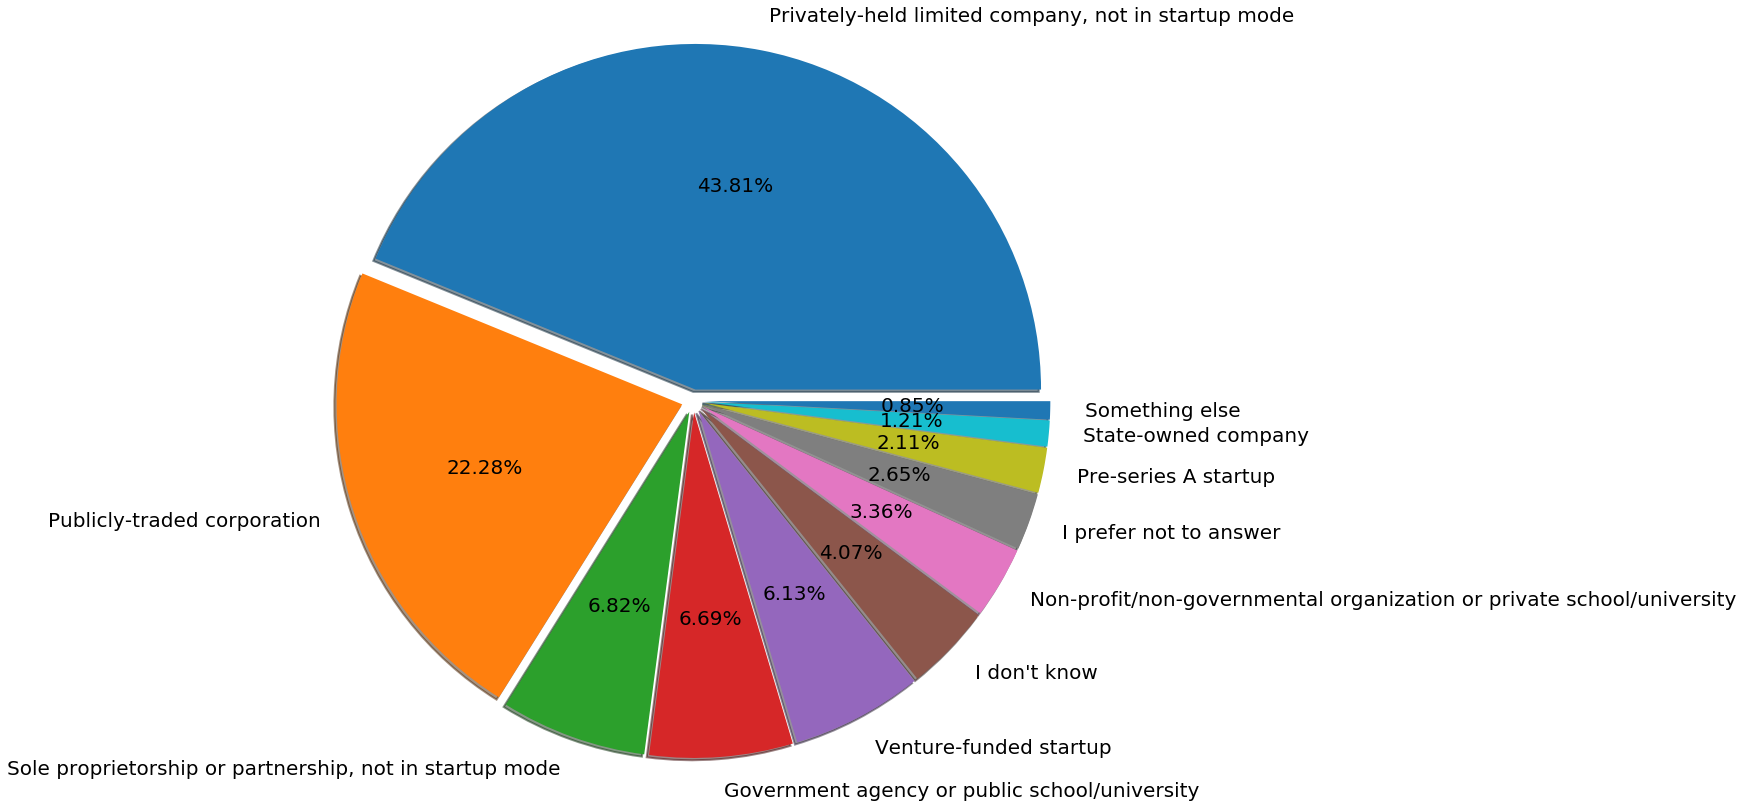

In [8]:
'''Pie Chart showing count of people working for different 
company_types and having Yearsprogram greater than or equal to 10'''

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
company_type = final_output['CompanyType'].tolist()
Counts = final_output['counts'].tolist()
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
patches, texts, autotexts=ax.pie(Counts, labels = company_type, autopct='%1.2f%%', 
                                 radius=3,textprops={'fontsize': 20},wedgeprops = {'linewidth': 2}, 
                                 shadow=True, explode=explode)

plt.show()


 # Question 2:

What are the programming languages widely have used by people across the world who have been programming experience for more than 10 years versus less than 10 years?

In [9]:
'''Count programming languages widely used by people
across the world who have been programming for more than
10 years versus less than 10 years'''

def Count_language(df2):
    df2=df2.dropna(subset=['HaveWorkedLanguage'])
    split_col=df2['HaveWorkedLanguage'].apply(lambda x: x.split(';'))
    languages = []
    for row in split_col:
        for val in row:
            languages.append(val.strip())
    dict_count_lang = dict(Counter(languages))
    series_dict = pd.Series(dict_count_lang, name='Count')
    series_dict.index.name = 'Programming_Language'
    series_dict.reset_index()
    final_df=series_dict.to_frame()
    return final_df


Count_lang_more_10=Count_language(df_more_10).sort_values(by=['Count'],ascending=False).reset_index()
Count_lang_less_10=Count_language(df_less_10).sort_values(by=['Count'],ascending=False).reset_index()
df1_styler = Count_lang_more_10.style.set_table_attributes("style='display:inline'").set_caption('Work Experience More Than 10')
df2_styler = Count_lang_less_10.style.set_table_attributes("style='display:inline'").set_caption('Work Experience Less Than 10')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)


,Programming_Language,Count
0,JavaScript,5451
1,SQL,4947
2,C#,3557
3,Java,2920
4,Python,2320
5,PHP,1949
6,C++,1799
7,C,1516
8,TypeScript,955
9,Ruby,747


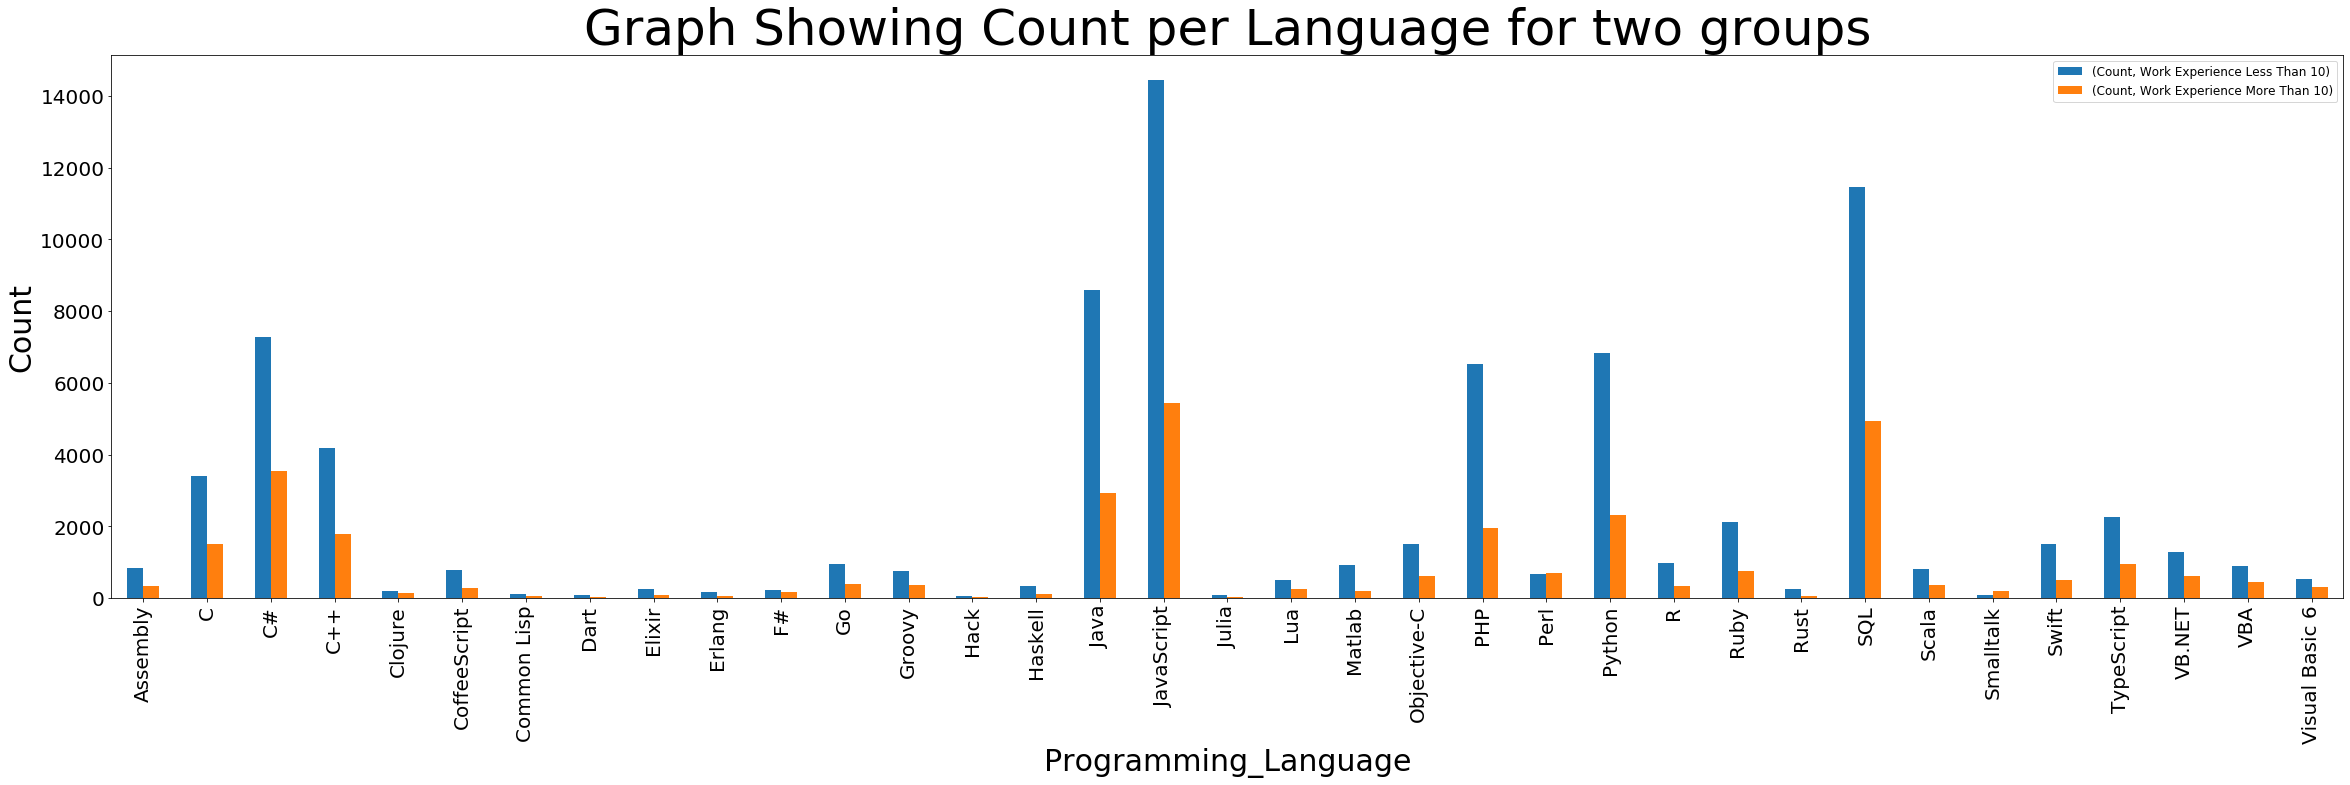

In [10]:
'''Graph showing Count of programming languages widely used by people
across the world who have been programming for more than
10 years versus less than 10 years'''

Count_lang_more_10['Key'] = 'Work Experience More Than 10'
Count_lang_less_10['Key'] = 'Work Experience Less Than 10'


DF = pd.concat([Count_lang_more_10,Count_lang_less_10],
               keys=['Work Experience More Than 10','Work Experience Less Than 10'])

DFGroup = DF.groupby(['Programming_Language','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar',
                                            figsize=(40,10),fontsize=20,
                                            title='Graph Showing Count per Language for two groups')
DFGPlot.title.set_size(50)
DFGPlot.set_ylabel("Count").set_size(30)
DFGPlot.set_xlabel("Programming_Language").set_size(30)
plt.legend(fontsize='large')


# Question 3: 

Check the employment status of people who have formal education in computer science/software engineering?

In [11]:
'''Finding the count of people who have Computer Science or 
Software Engineering as education according to employment status'''

Comp_Sci_edu=df1[df1['MajorUndergrad']=='Computer science or software engineering']
Comp_Sci_series=Comp_Sci_edu.groupby(['EmploymentStatus', 'FormalEducation']).size()
comp_sci=Comp_Sci_series.to_frame()
comp_sci.columns=['Count']
df_comp_sci=comp_sci.reset_index()
df_comp_sci.columns = ['EmploymentStatus', 'FormalEducation', 'Count']

comp_sci


Count
EmploymentStatus                                   FormalEducation                                          
Employed full-time                                 Bachelor's degree                                    9145
                                                   Doctoral degree                                       291
                                                   Master's degree                                      4374
                                                   Professional degree                                   188
                                                   Secondary school                                        3
                                                   Some college/university study without earning a...   2067
Employed part-time                                 Bachelor's degree                                     400
                                                   Doctoral degree                                         9
                                                   Master's degree                                       111
                                                   Professional degree                                     8
                                                   Some college/university study without earning a...    240
I prefer not to say                                Bachelor's degree                                      33
                                                   Doctoral degree                                         1
                                                   Master's degree                                        21
                                                   Some college/university study without earning a...     11
Independent contractor, freelancer, or self-emp... Bachelor's degree                                     769
                                                   Doctoral degree                                        34
                                                   Master's degree                                       486
                                                   Professional degree                                    26
                                                   Some college/university study without earning a...    313
Not employed, and not looking for work             Bachelor's degree                                      29
                                                   Doctoral degree                                         2
                                                   Master's degree                                        17
                                                   Some college/university study without earning a...     11
Not employed, but looking for work                 Bachelor's degree                                     144
                                                   Doctoral degree                                         1
                                                   I prefer not to answer                                  1
                                                   Master's degree                                        49
                                                   Professional degree                                     7
                                                   Some college/university study without earning a...     53
Retired                                            Doctoral degree                                         1
                                                   Master's degree                                         1
                                                   Some college/university study without earning a...      3

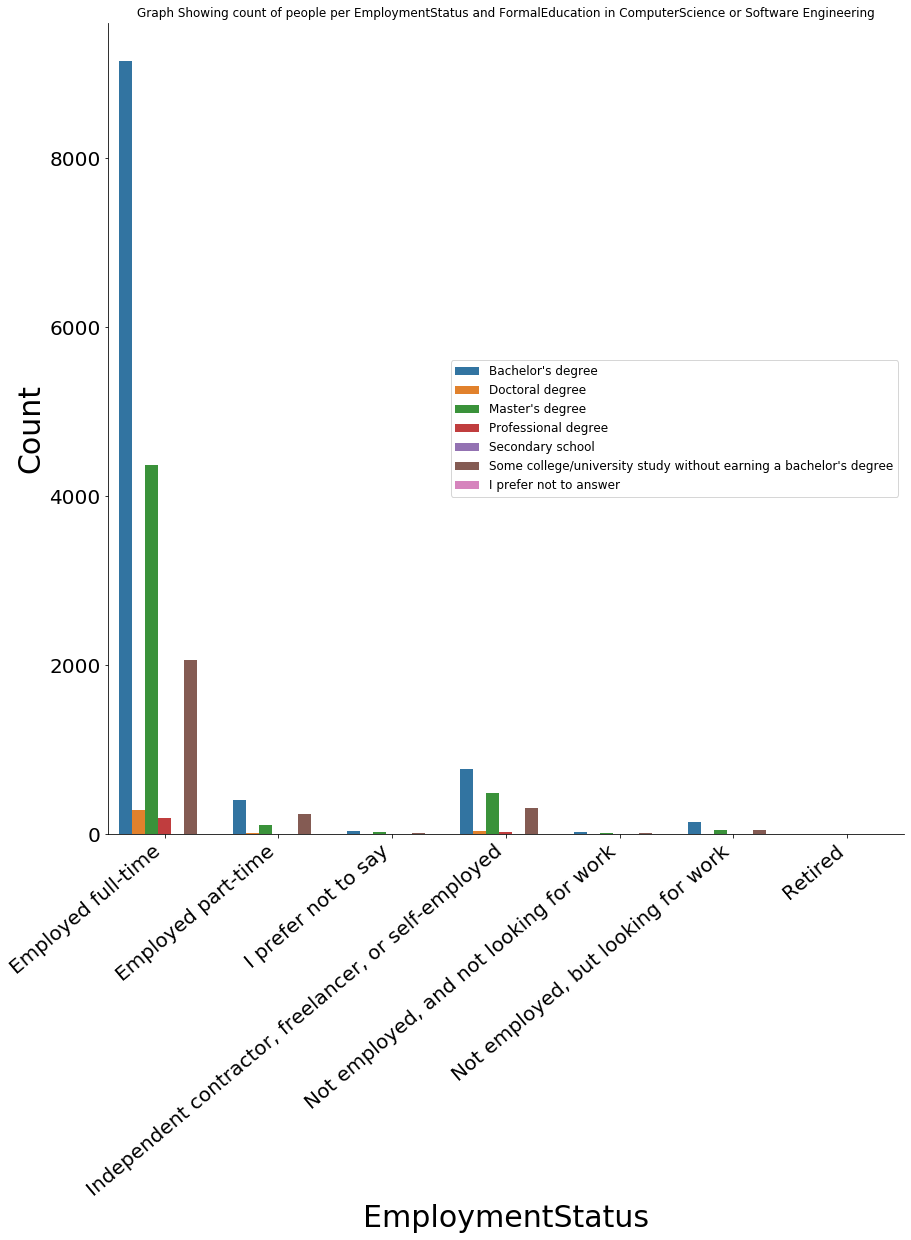

In [12]:
'''Graph showingthe count of people who have Computer Science or 
Software Engineering as education according to employment status'''

ax = sns.catplot(x="EmploymentStatus", y ='Count', hue='FormalEducation',
                   data=df_comp_sci, kind="bar", height=12, aspect=1, legend=False)
ax.set_xticklabels(rotation=40, ha="right", fontsize=20)
ax.set_yticklabels(fontsize=20)
ax.set_xlabels('EmploymentStatus', size=30)
ax.set_ylabels('Count', size=30)
plt.title("Graph Showing count of people per EmploymentStatus and"
              " FormalEducation in ComputerScience or Software Engineering")
plt.legend(fontsize='large', loc='center right')


# Conclusion

In this, we analyzed about coders who have more than 10 years of work experience and coders who have formal education in computer science/software engineering. Below are the results of the analysis.

1. It can be seen that mojority of coders who have more than 10 years of work experience work for privately-held organizations, not in startup mode.
2. Also,all the coders with high and low experience most widely use JavaScript, SQL, C#, Java, Python, PHP, C++ and C as programming languages.
3. Most coders who have a formal education in Computer science/Software Engineering are employed full-time.


A detailed explanation of the above analysis can ne found in the following medium post [here](https://medium.com/@venkatapooja.92/are-people-with-work-experience-bagged-by-companies-a39af3991005)
